In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/anjali/Becode_projects/Clustering_Enron/emails.csv",sep =";", nrows = 10000)
df

,from,to,cc,subject,date,body
0,kpeterso@epelectric.com,bill.williams@enron.com,NaN,Re: Models,"Wed, 23 May 2001 13:21:33 -0700 (PDT)","\nHi Bill,\n\nI know you have been out and I w..."
1,kpeterso@epelectric.com,bill.williams.iii@enron.com,NaN,Re: Model for 04-19,"Fri, 20 Apr 2001 19:57:00 -0700 (PDT)","\nHi Bill,\n\nOn yesterday's...HE16 from SRP s..."
2,kpeterso@epelectric.com,bill.williams@enron.com,NaN,RE: Model for 04-25,"Wed, 2 May 2001 16:05:19 -0700 (PDT)","\nSorry Bill,\n\nBut one more time...the ancil..."
3,kpeterso@epelectric.com,bill.williams.iii@enron.com,NaN,Re: Model for 04-17 and 04-18,"Thu, 19 Apr 2001 17:39:00 -0700 (PDT)","\nHi Bill,\n\nJust a couple of things on these..."
4,kpeterso@epelectric.com,bill.williams@enron.com,NaN,RE: Model for 04-25,"Wed, 2 May 2001 15:33:07 -0700 (PDT)",\nThanks for your help Bill.\n\nOne little thi...
...,...,...,...,...,...,...
9995,george.ellis@americas.bnpparibas.com,george_ellis@americas.bnpparibas.com,NaN,BNP PARIBAS Commodity Futures AGA Survey.........,"Wed, 23 Jan 2002 09:28:18 -0800 (PST)",\n\nHere are this week's survey results.\n\nAV...
9996,tmartin@nymex.com,"martin@enron.com, tmartin@nymex.com","gonzalez@enron.com, mgonzalez@nymex.com",Nymex statistics for week ending 10/19/01,"Wed, 24 Oct 2001 06:53:58 -0700 (PDT)",- NYMEXWEEKLY.xls
9997,michelle.nelson@enron.com,mike.maggi@enron.com,NaN,NaN,"Tue, 20 Nov 2001 10:41:23 -0800 (PST)",thanks for calling sir
9998,michelle.nelson@enron.com,mike.maggi@enron.com,NaN,RE:,"Wed, 21 Nov 2001 10:02:14 -0800 (PST)",are you sure about that? i am bored.\n\n ----...


In [3]:
df.isnull().sum() * 100 / len(df)

from        0.00
to          4.33
cc         70.60
subject     2.59
date        0.00
body        0.00
dtype: float64

In [4]:
df.duplicated().sum()

2264

In [5]:
df = df.drop_duplicates()

In [6]:
email_body = df["body"]
email_body

0       \nHi Bill,\n\nI know you have been out and I w...
1       \nHi Bill,\n\nOn yesterday's...HE16 from SRP s...
2       \nSorry Bill,\n\nBut one more time...the ancil...
3       \nHi Bill,\n\nJust a couple of things on these...
4       \nThanks for your help Bill.\n\nOne little thi...
                              ...                        
9995    \n\nHere are this week's survey results.\n\nAV...
9996                                   - NYMEXWEEKLY.xls 
9997                               thanks for calling sir
9998    are you sure about that?  i am bored.\n\n ----...
9999    (See attached file: closenc.pdf)\n\nThis messa...
Name: body, Length: 7736, dtype: object

### data Preprocessing 

In [7]:
# Import all libraries 
import gensim
import gensim.corpora as corpora 
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel 

In [8]:
import spacy 
import nlp 

In [9]:
# Convert email body  to list : create list of messages 
data = email_body.values.tolist()
len(data)                       # check length of list is sames no. of rows in dataset : correct 

7736

In [10]:
# Breakdown each sentence into a list of words : tokenize 
def sent_to_words(sentences): 
    for sentence in sentences: 
        yield(simple_preprocess(str(sentence), deacc = True))  # deacc = True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[3])




['hi', 'bill', 'just', 'couple', 'of', 'things', 'on', 'these', 'models', 'on', 'need', 'he', 'sale', 'to', 'enron', 'changed', 'to', 'an', 'mwh', 'tony', 'talked', 'to', 'mark', 'about', 'this', 'on', 'the', 'ancillary', 'are', 'not', 'adding', 'up', 'at', 'the', 'bottom', 'when', 'you', 'get', 'chance', 'just', 're', 'email', 'them', 'to', 'me', 'thanks', 'kathy']


In [11]:
from gensim.models.phrases import Phrases, Phraser 

# BUild the bigram and trigrams models 
bigram = Phrases(data_words, min_count = 5, threshold = 100)

trigram = Phrases(bigram[data_words], threshold = 100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# print(trigram_mod[bigram_mod[data_words[200]]])

In [12]:
# Lemmatization 
import nlp 

import spacy
nlp = spacy.load("en_core_web_sm")

In [13]:
# prep NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /home/anjali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:


# remove stop_words, make bigrams and lemmatize
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out



In [15]:


# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)



# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)



# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])



In [16]:
# print(data_lemmatized[200])

In [17]:
# create dictionary and corpus both are needed for (LDA) topic modeling

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [18]:


# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)



In [19]:


lda_model.show_topics()



[(14,
  '0.000*"basil" + 0.000*"barley" + 0.000*"buffet" + 0.000*"brunch" + 0.000*"breast" + 0.000*"bisque" + 0.000*"bella" + 0.000*"bean" + 0.000*"carrot" + 0.000*"bacon"'),
 (18,
  '0.000*"basil" + 0.000*"barley" + 0.000*"buffet" + 0.000*"brunch" + 0.000*"breast" + 0.000*"bisque" + 0.000*"bella" + 0.000*"bean" + 0.000*"carrot" + 0.000*"bacon"'),
 (5,
  '0.000*"basil" + 0.000*"barley" + 0.000*"buffet" + 0.000*"brunch" + 0.000*"breast" + 0.000*"bisque" + 0.000*"bella" + 0.000*"bean" + 0.000*"carrot" + 0.000*"bacon"'),
 (4,
  '0.000*"basil" + 0.000*"barley" + 0.000*"buffet" + 0.000*"brunch" + 0.000*"breast" + 0.000*"bisque" + 0.000*"bella" + 0.000*"bean" + 0.000*"carrot" + 0.000*"bacon"'),
 (17,
  '0.000*"basil" + 0.000*"barley" + 0.000*"buffet" + 0.000*"brunch" + 0.000*"breast" + 0.000*"bisque" + 0.000*"bella" + 0.000*"bean" + 0.000*"carrot" + 0.000*"bacon"'),
 (3,
  '0.383*"think" + 0.188*"call" + 0.060*"number" + 0.044*"hour" + 0.044*"team" + 0.029*"schedule" + 0.026*"detail" + 0.022

In [20]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -20.95582130652225


In [21]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4327517318201609


In [34]:
#What is the Dominant topic and its percentage contribution in each document
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
 # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

/tmp/ipykernel_21677/3839148995.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/tmp/ipykernel_21677/3839148995.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.4810,"go, get, thank, know, today, need, back, forwa...","[bill, know, next, week, mail, sale, pnm, need..."
1,1,2,0.6197,"go, get, thank, know, today, need, back, forwa...","[bill, yesterday, srp, also, ancillary, add, b..."
2,2,2,0.3425,"go, get, thank, know, today, need, back, forwa...","[sorry, bill, time, ancillary, regular, purcha..."
3,3,2,0.6280,"go, get, thank, know, today, need, back, forwa...","[bill, couple, thing, model, need, sale, chang..."
4,4,2,0.4732,"go, get, thank, know, today, need, back, forwa...","[thank, help, bill, little, thing, ancillary, ..."
5,5,2,0.5379,"go, get, thank, know, today, need, back, forwa...","[forward, com, document, link, bill, get, chan..."
6,6,19,0.4478,"com, good, power, list, due, status, marketing...","[reservation, status, change, detail, reservat..."
7,7,2,0.5123,"go, get, thank, know, today, need, back, forwa...","[bill, get, chance, correct, day, sale, ciso_p..."
8,8,2,0.7031,"go, get, thank, know, today, need, back, forwa...","[bill, get, back, office, today, go, day, litt..."
9,9,2,0.4505,"go, get, thank, know, today, need, back, forwa...","[good, morning, bill, move, bookout, top, dire..."


TypeError: 'numpy.float32' object is not iterable

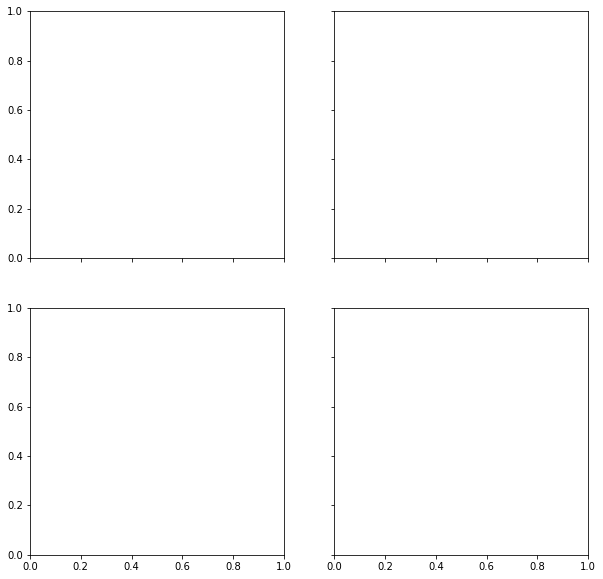

In [42]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topic(topicid=10)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_21677/2246158447.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/tmp/ipykernel_21677/2246158447.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


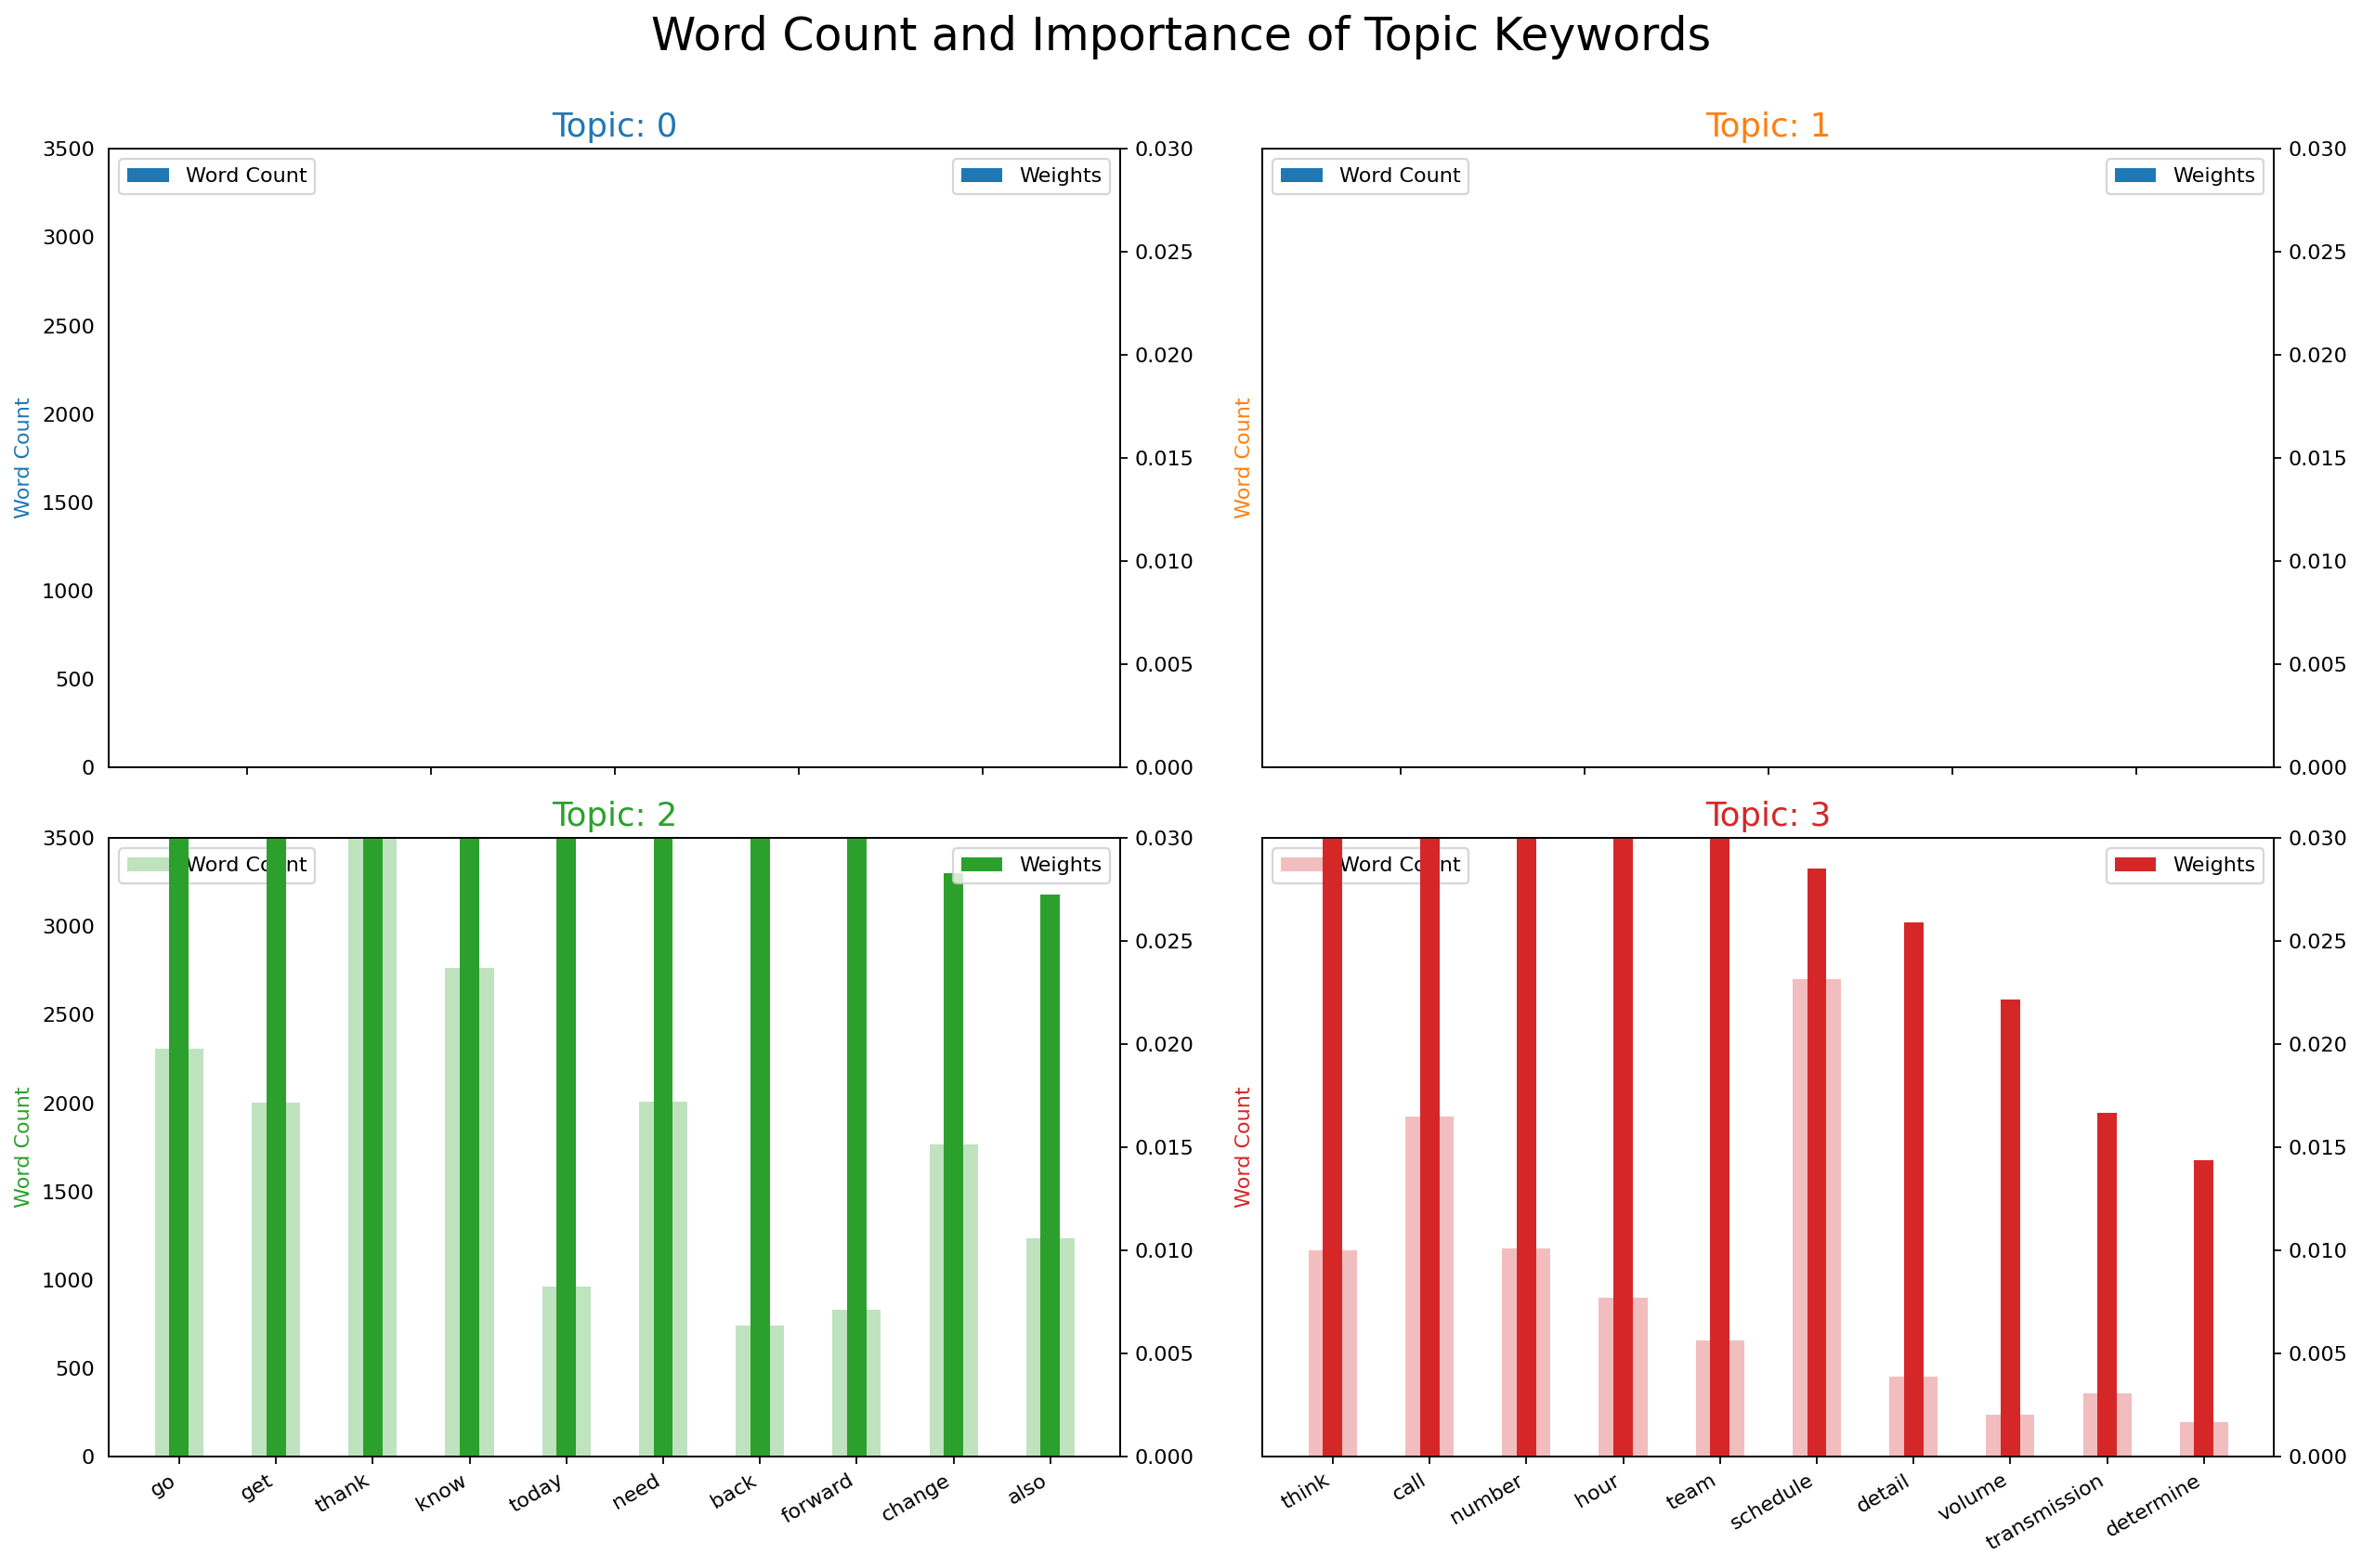

In [32]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [23]:
# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     """
#     Compute c_v coherence for various number of topics

#     Parameters:
#     ----------
#     dictionary : Gensim dictionary
#     corpus : Gensim corpus
#     texts : List of input texts
#     limit : Max num of topics

#     Returns:
#     -------
#     model_list : List of LDA topic models
#     coherence_values : Coherence values corresponding to the LDA model with respective number of topics
#     """
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=num_topics,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())

#     return model_list, coherence_values


In [24]:
# run
# model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=40, limit=100, step=6)



In [25]:
import matplotlib.pyplot as plt

# # Show graph
# limit=100; start=40; step=6;
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()



In [26]:


# Print the coherence scores
# for m, cv in zip(x, coherence_values):
#     print("Num Topics =", m, " has Coherence Value of", round(cv, 4))



In [27]:
# run
# model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=90, limit=150, step=6)

In [28]:
# Show graph
# limit=150; start=90; step=6;
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()

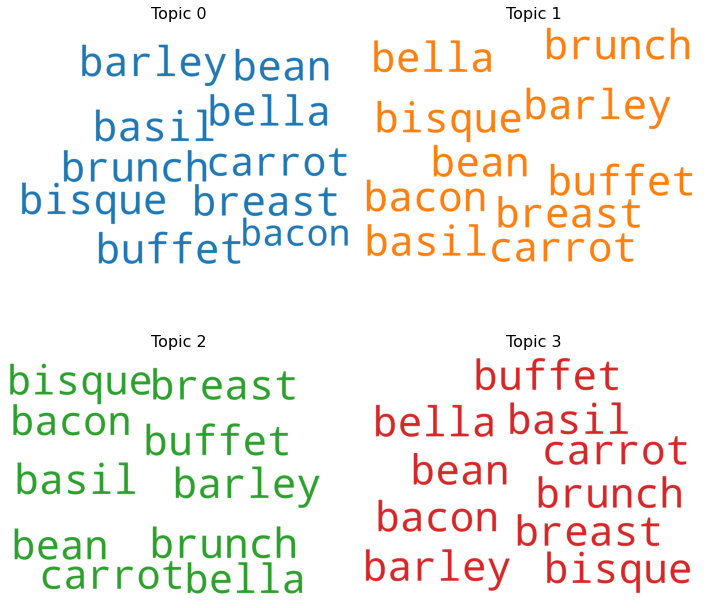

In [29]:
 # 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [30]:
# import pyLDAvis

# import matplotlib.pyplot as plt 
# import nltk

In [31]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis 

# import warnings
# try:
#     import pyLDAvis.gensim_models as gensimvis
#     CAN_VISUALIZE = True
#     pyLDAvis.enable_notebook()
#     from IPython.display import display
# except ImportError:
#     ValueError("SKIP: please install pyLDAvis")
#     CAN_VISUALIZE = False
# warnings.filterwarnings('ignore')
# %matplotlib inline




pyLDAvis.enable_notebook(sort=True)
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)


/home/anjali/.local/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/anjali/.local/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/anjali/.local/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/anjali/.local/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/anjali/.local/lib/python3.9/site-packages/past/builtins/misc.py

TypeError: Object of type complex is not JSON serializable